In [1]:
from matplotlib import pyplot as plt
from environments.env_antworld import Antworld
from learning_algorithms.hysteretic_q import HystereticAgent
import numpy as np
from PIL import Image

In [6]:
env = Antworld()
epochs = 1000
simulations = 1
epoch_length = 100
num_agents = 2
dim_x=5
dim_y=5

In [7]:
pheromone_sums = np.zeros((dim_x,dim_y))
ant_sums = np.zeros((dim_x,dim_y))
rewards_1 = []
rewards_2 = 0

for simulation in range(simulations):

    env = Antworld(agents_n=num_agents,dim_x=dim_x,dim_y=dim_y,food=(2,3))
    agents = [HystereticAgent(env,this_id) for this_id in range(num_agents)]

    # get initial observations/rewards
    observations, rewards, _, _ = env.step([],[x for x in range(num_agents)])
    #print(observations)
    
    

    for epoch in range(epochs):
        env.reset()

        sum_rewards = 0
        for time in range(epoch_length):
            actions = []
            for agent_num in range(num_agents):
                actions += [agents[agent_num].get_action_from_observation(observations[agent_num]),]

            prev_observations = observations
            observations, rewards, _, _, = env.step(actions,[x for x in range(num_agents)])
            
            pheromones, ants = env.pheromone_output()
            pheromone_sums += pheromones
            ant_sums += ants
            
            if epoch == epochs-1:
                env.display()

            sum_rewards += sum(rewards)
            for agent_num in range(num_agents):
                agents[agent_num].q_learn(prev_observations[agent_num],actions[agent_num],observations[agent_num],rewards[agent_num])
            
        ##env.display()
            
        #print(sum_rewards)
        rewards_2 = 0.95*rewards_2+0.05*sum_rewards
        rewards_1 += [rewards_2,]


.....
.....
..pa.
...F.
.....

.....
.....
..pp.
...F.
.....

.....
.....
..pp.
...F.
.....

.....
.....
..pp.
..aa.
.....

.....
.....
..pp.
...p.
..a..

.....
.....
..pp.
...pa
..a..

.....
.....
..pp.
..ap.
.....

.....
.....
..pp.
...p.
.....

.....
..a..
..pp.
...p.
.....

.....
.....
..pp.
...p.
.....

.....
.....
.app.
..ap.
.....

.....
.a...
..pp.
..pp.
.....

.....
a....
..pp.
..pp.
.....

.....
.....
a.pp.
..pp.
...a.

.....
a....
..pp.
..pp.
.....

a....
.....
..pp.
..pp.
...a.

p....
.....
..pp.
..pp.
....a

p....
.....
..pp.
..pp.
....p

pa...
.....
..pp.
..ppa
....p

p....
.a...
..pp.
..ppp
....p

p....
a....
..ppa
..ppp
....p

p....
.a...
..pp.
..ppp
....p

p....
.p.a.
..pp.
..ppp
....p

p....
.pa..
..pp.
..ppp
....p

p....
.pp..
..pp.
..ppp
....p

p....
.ppa.
.app.
..ppp
....p

p....
.pp..
..pp.
.appp
....p

p.a..
.pp..
..pp.
.pppp
....p

pa...
.pp..
..pp.
.pppp
....p

p.a..
.pp..
..pp.
.pppp
....p

pa...
.pp..
..pp.
.pppp
....p

pa...
.pp..
..pp.
.pppp
....p

p.a..
.p

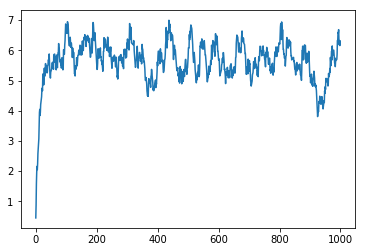

In [8]:
plt.plot(list(range(len(rewards_1))),rewards_1)
plt.show()

0.0


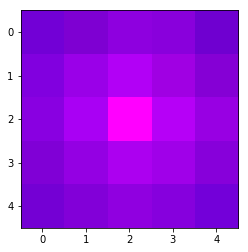

In [9]:
pheromone_sums = pheromone_sums/np.max(pheromone_sums)
ant_sums = ant_sums/np.max(ant_sums)
im = np.stack([pheromone_sums,np.zeros((dim_x,dim_y)),ant_sums,],axis=-1)
print(im.min())
# plt.imshow(Image.fromarray(im)).convert('rgb')
plt.imshow(im)